In [37]:
#-*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [74]:
class AdalineSGD(object):
    eta : float # 学习速率
    n_iter : int #迭代次数
    w_ : np.zeros(0) #权重
    cost_ : list #每次迭代代价函数的具体值，体现了预测的准确程度
    shuffle : bool #每次迭代随机选取训练样本
    random_state : int #指定随机数种子
    w_initialized : bool #权重是否初始化
        
    def __init__(self, eta = 0.01, n_iter = 10,shuffle = True,random_state = None):
        self.eta = eta
        self.n_iter = n_iter
        self.shuffle = shuffle
        if random_state:
            seed(random_state)
    
    def _shuffle(self,X,y): #随机选取样本
        r = np.random.permutation(len(y))
        return X[r],y[r]
    
    def _initialize_weights(self,m): #初始化权重
        self.w_ = np.zeros(1+m)
        self.w_initialized = True
    
    def _update_weights(self,xi,target): #更新权重
        output = self.net_input(xi)
        error = target - output
        self.w_[1:] += self.eta * xi.dot(error) #单个样本更新权重
        self.w_[0] += self.eta * error
        cost = (error**2) / 2.0
        return cost
    
#     def partial_fit(self,X,y): # 训练部分数据
#         if not self.w_initialized:
#             self._initialize_weights(X.shape[1])
#         if y.reval().shape[0] > 1:
#             for xi,target in zip(X,y):
#                 self._update_weights(xi,target)
#         else:
#             self._update_weights(X,y)
#         return self
        
        
    def net_input(self,X):
        return np.dot(X,self.w_[1:]) + self.w_[0]
    
    def activation(self,X):
        return self.net_input(X)
    
    def predict(self,X): #预测结果 1代表变色鸢尾花，-1代表山鸢尾花
        return np.where(self.net_input(X) >= 0, 1, -1)
    
    def fit(self,X,y): #训练模型，X为特征矩阵 行为样本 列为特征，y为样本实际分类1代表变色鸢尾花，-1代表山鸢尾花
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for _ in range(self.n_iter):
            if self.shuffle:
                X,y = self._shuffle(X,y)
            cost = []
            for xi,target in zip(X,y):
                cost.append(self._update_weights(xi,target))
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
        return self

In [75]:
import pandas as pd 
import matplotlib.pyplot as plt
# df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header = None) 
# UCI经常超时，这里本地加载数据集
df = pd.read_csv('Iris.csv')
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


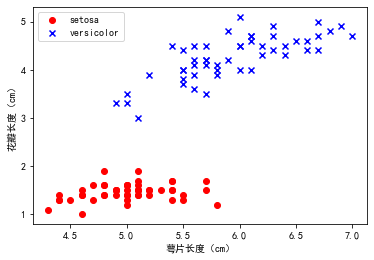

In [76]:
y = df.iloc[0:100,5].values #从UCI加载的数据和从csv加载的数据特征不一样，csv多了一个Id，注意对应
y = np.where(y == 'Iris-setosa',-1,1)
X = df.iloc[0:100,[1,3]].values
plt.scatter(X[:50,0], X[:50,1], color = 'red', marker = 'o', label = 'setosa')
plt.scatter(X[50:100,0], X[50:100,1],color = 'blue', marker = 'x', label = 'versicolor')
plt.legend(loc = 'upper left')
plt.xlabel('萼片长度（cm）')
plt.ylabel('花瓣长度（cm）')
plt.show()
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

In [77]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y,classifier,resolution = 0.02):
    #初始化 markers 和 color map
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # 绘制决策边界
    x1_min ,x1_max = X[:,0].min() -1,X[:,0].max() +1
    x2_min, x2_max = X[:,1].min() -1,X[:,1].max() +1
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                          np.arange(x2_min,x2_max,resolution))
    z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T) 
    z = z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,z, alpha = 0.4,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    print(cmap)
    #绘制样本点
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl,0],y = X[y == cl,1], alpha = 0.8,
                    c = colors[idx], marker = markers[idx], label = cl)

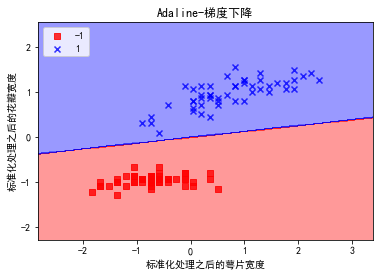

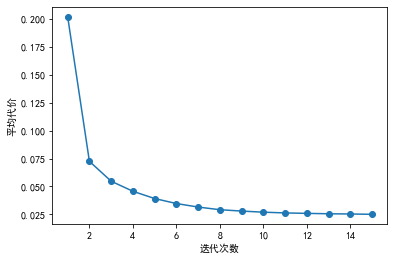

In [78]:
ada = AdalineSGD(n_iter=15,eta=0.01,random_state=1)
ada.fit(X_std,y)
plot_decision_regions(X_std,y,classifier=ada)
plt.title('Adaline-梯度下降')
plt.xlabel('标准化处理之后的萼片宽度')
plt.ylabel('标准化处理之后的花瓣宽度')
plt.legend(loc = 'upper left')
plt.show()
plt.plot(range(1,len(ada.cost_)+1),ada.cost_,marker = 'o')
plt.xlabel('迭代次数')
plt.ylabel('平均代价')
plt.show()